In [ ]:
# Import python library for this notebook
import numpy as np # fundamental package for scientific computing
import matplotlib.pyplot as plt # package for plot function

# show figures inline
%matplotlib inline 

def myimshow(I, **kwargs):
    # utility function to show image
    plt.figure();
    plt.axis('off')
    plt.imshow(I, cmap=plt.gray(), **kwargs)

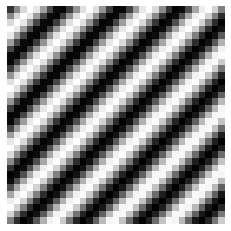

In [ ]:
def genSinusoid(sz, A, omega, rho):
    # Generate Sinusoid grating
    # sz: size of generated image (width, height)
    radius = (int(sz[0]/2.0), int(sz[1]/2.0))
    [x, y] = np.meshgrid(range(-radius[0], radius[0]+1), range(-radius[1], radius[1]+1)) # a BUG is fixed in this line

    stimuli = A * np.cos(omega[0] * x  + omega[1] * y + rho)
    return stimuli

theta = np.pi/4
omega = [np.cos(theta), np.sin(theta)]
sinusoidParam = {'A':1, 'omega':omega, 'rho':np.pi/2, 'sz':(32,32)}
myimshow(genSinusoid(**sinusoidParam)) 
# ** is a special syntax in python, which enables passing a key-value dictionary as parameter


1.5140274644582012e-05

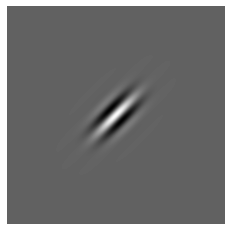

In [ ]:
def genGabor(sz, omega, theta, func=np.cos, K=np.pi):
    radius = (int(sz[0]/2.0), int(sz[1]/2.0))
    [x, y] = np.meshgrid(range(-radius[0], radius[0]+1), range(-radius[1], radius[1]+1))

    x1 = x * np.cos(theta) + y * np.sin(theta)
    y1 = -x * np.sin(theta) + y * np.cos(theta)
    
    gauss = omega**2 / (4*np.pi * K**2) * np.exp(- omega**2 / (8*K**2) * ( 4 * x1**2 + y1**2))
#     myimshow(gauss)
    sinusoid = func(omega * x1) * np.exp(K**2 / 2)
#     myimshow(sinusoid)
    gabor = gauss * sinusoid
    return gabor
        
g = genGabor((256,256), 0.3, np.pi/4, func=np.cos) 
# change func to "cos", "sin" can generate sin gabor or cos gabor, here we pass a function name as a parameter
myimshow(g)
np.mean(g)

In [ ]:
from IPython.html.widgets import interact, interactive, fixed
def demoGabor(theta, omega):
    myimshow(genGabor((128,128), omega, theta))
interact(demoGabor, theta=(0,np.pi,np.pi/8), omega=(0.1,1,0.1))

/usr/local/lib/python3.6/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


interactive(children=(FloatSlider(value=1.5707963267948966, description='theta', max=3.141592653589793, step=0…

<function __main__.demoGabor>

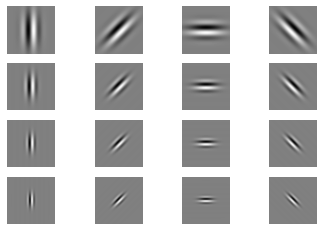

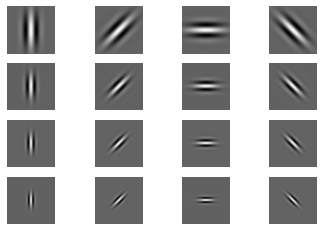

In [ ]:
theta = np.arange(0, np.pi, np.pi/4) # range of theta
omega = np.arange(0.2, 0.6, 0.1) # range of omega
params = [(t,o) for o in omega for t in theta]
sinFilterBank = []
cosFilterBank = []
gaborParams = []
for (theta, omega) in params:
    gaborParam = {'omega':omega, 'theta':theta, 'sz':(128, 128)}
    sinGabor = genGabor(func=np.sin, **gaborParam)
    cosGabor = genGabor(func=np.cos, **gaborParam)
    sinFilterBank.append(sinGabor)
    cosFilterBank.append(cosGabor)
    gaborParams.append(gaborParam)

plt.figure()
n = len(sinFilterBank)
for i in range(n):
    plt.subplot(4,4,i+1)
    # title(r'$\theta$={theta:.2f}$\omega$={omega}'.format(**gaborParams[i]))
    plt.axis('off'); plt.imshow(sinFilterBank[i])

plt.figure()
for i in range(n):
    plt.subplot(4,4,i+1)
    # title(r'$\theta$={theta:.2f}$\omega$={omega}'.format(**gaborParams[i]))
    plt.axis('off'); plt.imshow(cosFilterBank[i])

Saving img.PNG to img (3).PNG
CPU times: user 451 µs, sys: 0 ns, total: 451 µs
Wall time: 456 µs


<Figure size 432x288 with 0 Axes>

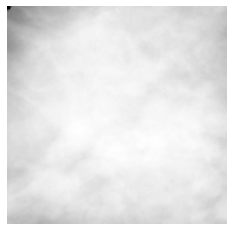

<Figure size 432x288 with 0 Axes>

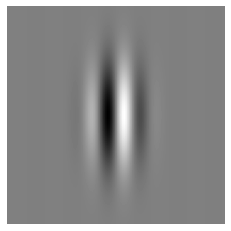

<Figure size 432x288 with 0 Axes>

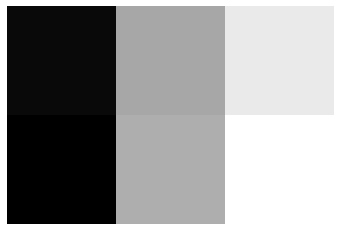

In [ ]:

from skimage.color import rgb2gray
from scipy.signal import convolve2d
from google.colab import files
files.upload()
zebra = rgb2gray(plt.imread('img.PNG'))
plt.figure(); myimshow(zebra)
sinGabor = sinFilterBank[4] 
plt.figure(); myimshow(sinGabor)
%time res = convolve2d(zebra, sinGabor, mode='valid') # Will take about one minute
plt.figure(); myimshow(res); # title('response') Book figure

Saving img1.PNG to img1.PNG
CPU times: user 6.07 ms, sys: 1 µs, total: 6.07 ms
Wall time: 6.08 ms


<Figure size 432x288 with 0 Axes>

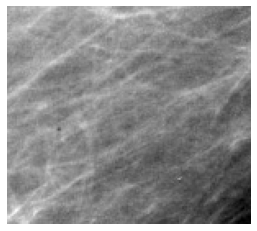

<Figure size 432x288 with 0 Axes>

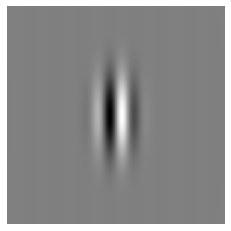

<Figure size 432x288 with 0 Axes>

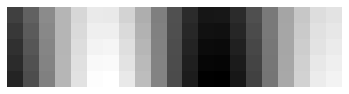

In [ ]:

from skimage.color import rgb2gray
from scipy.signal import convolve2d
from google.colab import files
files.upload()
zebra = rgb2gray(plt.imread('img1.PNG'))
plt.figure(); myimshow(zebra)
sinGabor = sinFilterBank[8] 
plt.figure(); myimshow(sinGabor)
%time res = convolve2d(zebra, sinGabor, mode='valid') # Will take about one minute
plt.figure(); myimshow(res); # title('response') Book figure

Text(0.5, 1.0, 'Resp. of complex cell')

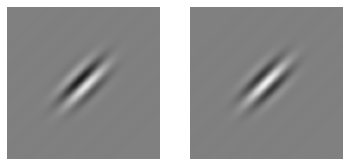

<Figure size 432x288 with 0 Axes>

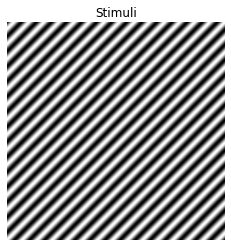

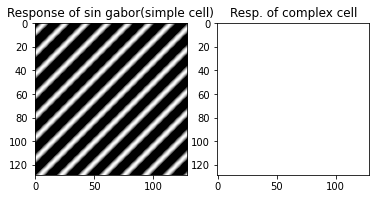

In [ ]:

theta = np.pi/4
sinGabor = genGabor((129,129), 0.4, theta, np.sin)
cosGabor = genGabor((129,129), 0.4, theta, np.cos)
plt.figure(); 
plt.subplot(121); plt.axis('off'); plt.imshow(sinGabor, vmin=-0.2, vmax=0.2)
plt.subplot(122); plt.axis('off'); plt.imshow(cosGabor, vmin=-0.2, vmax=0.2)

theta = np.pi/4 + np.pi
sinusoid = genSinusoid((256,256), 1, (omega*np.sin(theta), omega*np.cos(theta)), 0)
plt.figure(); myimshow(sinusoid); plt.title('Stimuli')

response = convolve2d(sinusoid, sinGabor, mode='valid')
response2 = convolve2d(sinusoid, cosGabor, mode='valid')

plt.figure(); 
plt.subplot(121); plt.imshow(response, vmin=0); plt.title('Response of sin gabor(simple cell)')
plt.subplot(122); plt.imshow(response**2 + response2**2, vmin=0); plt.title('Resp. of complex cell')